# Correlation between Education Expenditure to GDP per Capita in 2023
Education spending has been proven to significantly enhances GDP to support long-term economic resilience (Diakodimit et al., 2025). This report aims to determine whether there is any correlation between the total percentage of education expenditures with GDP per Capita. 

The datasets utilized are GDP per Capita (https://ourworldindata.org/grapher/gdp-per-capita-worldbank?overlay=download-data) and Education Spending (https://ourworldindata.org/grapher/total-government-expenditure-on-education-gdp?overlay=download-data).

## Data Wrangling
Data cleansing were conducted to ensure the reliability, which involves retaining only consistent and relevant data of 2023 since 2024 data has not been updated. 

In [1]:
# Data Wrangling for GDP per Capita

import numpy as np

# Define the name of file of GDP
file_gdp = 'gdp-per-capita-worldbank-final.csv'

# Define the data type using numpy data type
# The code being used is U for string, i for integer, and f for floating number
dtype = [('Entity', 'U25'), # 25-character string
        ('Code', 'U25'), # 25-character string
        ('Year', 'i4'), # 32-bit signed integer
        ('GDP_per_Capita', 'f8')] # 64-bit floating-point number

# Create a list without element 
rows = []

# Open the csv file to read
gdp_data = open(file_gdp, 'r')
header = gdp_data.readline()

for g in gdp_data:
    g = g.strip() # Remove any space 
    if g == '':
        pass  
    else:
        collumn_gdp = g.split(';') # Define the delimiter of data
        collumn_gdp = collumn_gdp[:4] # Define the collumn of interest

        # If there is any missing data, must put N/A
        ## Missing data for Country (entity)
        entity_gdp = collumn_gdp[0]
        if entity_gdp == '':
            entity_gdp = 'N/A'
        else:
            entity_gdp = entity_gdp

        ## Missing data for Code of Country (Code)
        code_gdp = collumn_gdp[1]
        if code_gdp == '':
            code_gdp = 'N/A'
        else:
            code_gdp = code_gdp

        ## Missing data for Year
        year_str = collumn_gdp[2]
        if year_str != '' and year_str.isdigit(): # Validate there is only digit in the data and is not empty
            year_gdp = int(year_str) # Convert into integer
        else:
            year_gdp = 0

        ## Missing data for GDP and change to float since there is decimal
        GDP_per_Capita = collumn_gdp[3]
        if GDP_per_Capita != '':
            gdp_replace = GDP_per_Capita.replace('.', '', 1) # Validate the remaining data is digit
            if gdp_replace.isdigit():
                GDP = float(GDP_per_Capita) # Convert into float
            else:
                gdp_replace = 'N/A'
                GDP = np.nan
        else:
            GDP = np.nan

        # Append the list with the requirement of only 2023 with valid GDP
        if year_gdp == 2023 and not np.isnan(GDP):
            rows.append((entity_gdp, code_gdp, year_gdp, GDP))

gdp_data.close()
gdp_data_2023 = np.array(rows, dtype=dtype)

# Print the Sample of Data 
print ('['+'('+' Entity '+','+' Code '+','+' Year '+','+' GDP per Capita ($) '+')'+']') 
print(gdp_data_2023[:10])

[( Entity , Code , Year , GDP per Capita ($) )]
[('Afghanistan', 'AFG', 2023,  1983.8126)
 ('Albania', 'ALB', 2023, 17991.016 ) ('Algeria', 'DZA', 2023, 15159.324 )
 ('Andorra', 'AND', 2023, 64631.297 ) ('Angola', 'AGO', 2023,  7250.403 )
 ('Antigua and Barbuda', 'ATG', 2023, 28474.045 )
 ('Argentina', 'ARG', 2023, 27104.98  )
 ('Armenia', 'ARM', 2023, 19402.752 ) ('Aruba', 'ABW', 2023, 40516.81  )
 ('Australia', 'AUS', 2023, 60461.156 )]


In [2]:
# Data Wrangling for Education Expenditure 

import numpy as np

# Define the name of file of ED
file_ed = 'total-government-expenditure-on-education-gdp.csv'

# Define the data type using numpy data type
# The code being used is U for string, i for integer, and f for floating number
dtype = [('Entity', 'U25'), # 25-character string
        ('Code', 'U25'), # 25-character string
        ('Year', 'i4'), # 32-bit signed integer
        ('Education_Expense', 'f8')] # 64-bit floating-point number

# Create a list without element
rows_ed = []

# Open the csv file to read
ed_data = open(file_ed, 'r')
header = ed_data.readline()

for e in ed_data:
    e = e.strip() # Remove any space
    if e == '':
        pass  
    else:
        collumn_ed = e.split(',') # Define the delimiter of data
        collumn_ed = collumn_ed[:4] # Define the collumn of interest
        
        # If there is any missing data, must put N/A
        ## Missing data for Country (entity)
        entity_ed = collumn_ed[0]
        if entity_ed == '':
            entity_ed = 'N/A'
        else:
            entity_ed = entity_ed

        ## Missing data for Code of Country (Code)
        code_ed = collumn_ed[1]
        if code_ed == '':
            code_ed = 'N/A'
        else:
            code_ed = code_ed

        # Missing data for Year
        year_str = collumn_ed[2]
        if year_str != '' and year_str.isdigit(): # Validate there is only digit in the data and is not empty
            year_ed = int(year_str) # Convert into integer
        else:
            year_ed = 0
            
        # Missing data for Education Expense
        Education_Expense = collumn_ed[3]
        if Education_Expense != '':
            ed_replace = Education_Expense.replace('.', '', 1) # Validate the remaining data is digit
            if ed_replace.isdigit():
                ED = float(Education_Expense) # Convert into float
            else:
                ED = np.nan
        else:
            Ed = np.nan

        # Append the list with the requirement of only 2023 with valid ED
        if year_ed == 2023 and not np.isnan(ED):
            rows_ed.append((entity_ed, code_ed, year_ed, ED))

ed_data.close()
ed_data_2023 = np.array(rows_ed, dtype=dtype)

# Print the Sample of Data
print ('['+'('+' Entity '+','+' Code '+','+' Year '+','+' Education Expense (%) '+')'+']') 
print(ed_data_2023[:10])

[( Entity , Code , Year , Education Expense (%) )]
[('Albania', 'ALB', 2023, 2.9180596) ('Algeria', 'DZA', 2023, 5.610157 )
 ('Andorra', 'AND', 2023, 1.92791  ) ('Angola', 'AGO', 2023, 2.5127366)
 ('Antigua and Barbuda', 'ATG', 2023, 3.1050515)
 ('Armenia', 'ARM', 2023, 2.42597  )
 ('Azerbaijan', 'AZE', 2023, 3.5829003)
 ('Bahamas', 'BHS', 2023, 2.7757437)
 ('Bangladesh', 'BGD', 2023, 1.7752274)
 ('Barbados', 'BRB', 2023, 4.04476  )]


## Validation of Merged Dataset
Both data will be merged to form a unified dataset based on a common identifier and only data contains valid values will be used.

In [3]:
# Combining Dataset of GDP per Capita and Education Expense

# Create a list without element
combined_ed = []

for g in gdp_data_2023:
    for e in ed_data_2023:
                if g['Code'] == e['Code'] and g['Year'] == e['Year']: # Do matching of the data based on code of country and year
                    combined_ed.append((g['Entity'], g['Code'], g['Year'], g['GDP_per_Capita'], 
                                 e['Education_Expense'])) # Append both data

# Define the data type using numpy data type
dtype_combined_ed = [('Entity', 'U25'), 
                  ('Code', 'U10'), 
                  ('Year', 'i4'),
                  ('GDP_per_capita', 'f8'), 
                  ('Education_Expense', 'f8')]

# Append the list
data_combined_ed = np.array(combined_ed, dtype=dtype_combined_ed)
data_combined_ed_final = data_combined_ed[data_combined_ed['Code'] != 'N/A'] # N/A code means it is not a country, but other group

# Only accept unique value
data_combined_ed_unique = np.unique(data_combined_ed_final)

# Print the Sample of Data
print ('['+'('+' Entity '+','+' Code '+','+' Year '+','+' GDP per Capita ($) '+','+' Education Expense (%) '+')'+']') 
print (data_combined_ed_unique[:10])
print ('Total Population: ',(len (data_combined_ed_unique)))

[( Entity , Code , Year , GDP per Capita ($) , Education Expense (%) )]
[('Albania', 'ALB', 2023, 17991.016, 2.9180596)
 ('Algeria', 'DZA', 2023, 15159.324, 5.610157 )
 ('Andorra', 'AND', 2023, 64631.297, 1.92791  )
 ('Angola', 'AGO', 2023,  7250.403, 2.5127366)
 ('Antigua and Barbuda', 'ATG', 2023, 28474.045, 3.1050515)
 ('Armenia', 'ARM', 2023, 19402.752, 2.42597  )
 ('Azerbaijan', 'AZE', 2023, 21310.738, 3.5829003)
 ('Bahamas', 'BHS', 2023, 35221.31 , 2.7757437)
 ('Bangladesh', 'BGD', 2023,  8242.398, 1.7752274)
 ('Barbados', 'BRB', 2023, 19224.463, 4.04476  )]
Total Population:  105


In [4]:
# Validate there is no wrong data
min_gdp = np.min(data_combined_ed_unique['GDP_per_capita'])
max_gdp = np.max(data_combined_ed_unique['GDP_per_capita'])

print("Minimum Value of GDP:", str(min_gdp))
print("Maximum Value of GDP:", str(max_gdp))

# Ensure is no data being flagged as 0 or -99999
if (min_gdp > 0) and (min_gdp > - 99999):
    print("Value of GDP per Capita is appropriate.")
else:
    print ("Value of GDP per Capita is inappropriate.")

print()

# Validate there is no wrong data
min_ed = np.min(data_combined_ed_unique['Education_Expense'])
max_ed = np.max(data_combined_ed_unique['Education_Expense'])

print("Minimum Value of Education Expense (%):", str(min_ed))
print("Maximum Value of Education Expense (%):", str(max_ed))

# Ensure is no data being flagged as 0 or -99999
if (min_ed > 0) and (min_ed > - 99999):
    print("Value of Education Expense is appropriate.")
else:
    print ("Value of Education Expense is inappropriate.")

Minimum Value of GDP: 1132.6764
Maximum Value of GDP: 129555.24
Value of GDP per Capita is appropriate.

Minimum Value of Education Expense (%): 0.3847713
Maximum Value of Education Expense (%): 16.39053
Value of Education Expense is appropriate.


## Data Exploration

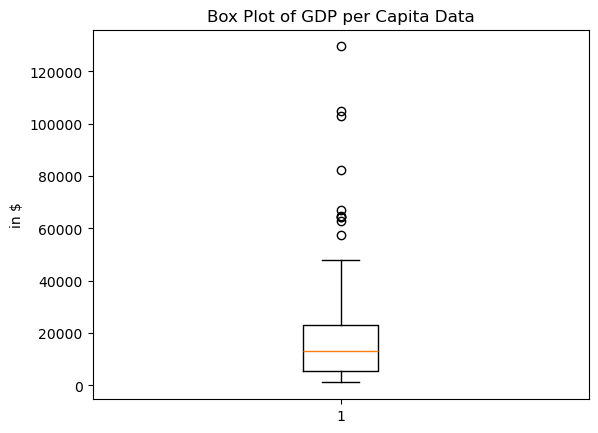

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Create box plot for GDP variable
plt.boxplot(data_combined_ed_unique['GDP_per_capita'])

# Add graph title and axis labels
plt.title('Box Plot of GDP per Capita Data')
plt.ylabel('in $')

# Show plot
plt.show()

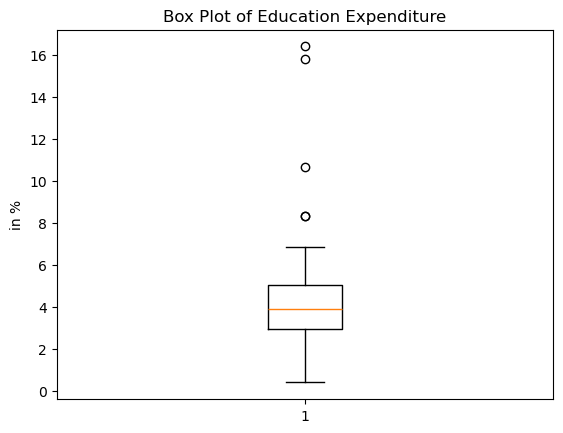

In [6]:
# Create box plot for education expenditure variable
plt.boxplot(data_combined_ed_unique['Education_Expense'])

# Add graph title and axis labels
plt.title('Box Plot of Education Expenditure')
plt.ylabel('in %')

# Show plot
plt.show()

A dataset with normal distribution is typically characterized by the mean and median being in the center within the distribution. Both variable appear to not be normally distributed. 

To further our understanding related to the distribution of data, we use shapiro-wilk test with the following hypothesis:

H0: The data are normally distributed.

H1: The data are not normally distributed.

In [10]:
from scipy.stats import shapiro

shapiro_wilk_1 = shapiro(data_combined_ed_unique['GDP_per_capita'])
shapiro_wilk_2 = shapiro(data_combined_ed_unique['Education_Expense'])

print('GDP per Capita: ', shapiro_wilk_1)
print('Education Expense: ',shapiro_wilk_2)

# Interpret the results
alpha = 0.05
if shapiro_wilk_1.pvalue <= alpha:
    print(round(shapiro_wilk_1.pvalue,4),'<','alpha = ',alpha ,': We reject the null hypothesis H0.')
else:
    print(round(shapiro_wilk_1.pvalue,4),'>','alpha = ',alpha ,': We do not reject the null hypothesis H0.')

if shapiro_wilk_2.pvalue <= alpha:
    print(round(shapiro_wilk_2.pvalue,4),'<','alpha = ',alpha ,': We reject the null hypothesis H0.')
else:
    print(round(shapiro_wilk_2.pvalue,4),'>','alpha = ',alpha ,': We do not reject the null hypothesis H0.')

GDP per Capita:  ShapiroResult(statistic=0.713157400311415, pvalue=5.016018488508581e-13)
Education Expense:  ShapiroResult(statistic=0.7748062115402381, pvalue=2.1719039884225852e-11)
0.0 < alpha =  0.05 : We reject the null hypothesis H0.
0.0 < alpha =  0.05 : We reject the null hypothesis H0.


It is noted that the p-value is very small meaning that we reject the null hypothesis for both.

However, it is assumed that the data are normally distributed. 

## Welch's t-Test of Education Expense Based on Group
H0: There is no significant difference between both group.

H1: There is significant difference between both group.

To determine whether there is a strong evidence to suggest that the both population differ significantly when countries are classified based on their GDP per Capita.

In [11]:
from scipy.stats import ttest_ind

# Conduct Welch's t-Test
# Differentiate between the upper-middle and high income with the lower-middle and lower income
# Based on Our World Data, the upper-middle and high income is associated with GDP per capita above 20.882 in 2023

high_income_ed = data_combined_ed_unique[data_combined_ed_unique['GDP_per_capita'] >= 20882]['Education_Expense']
low_income_ed = data_combined_ed_unique[data_combined_ed_unique['GDP_per_capita'] < 20882]['Education_Expense']

print('Variance of High Income Country: '+str(round(np.var(high_income_ed),2)))
print('Variance of Low Income Country: '+str(round(np.var(low_income_ed),2)))

t_statistic, p_value = ttest_ind(a=high_income_ed, b=low_income_ed, equal_var = False)

print('t_statistic :',round(t_statistic,4))

print('p_value :',round(p_value,4))

# Interpret the results
alpha_ed = 0.05
if p_value <= alpha_ed:
    print(round(p_value,4),'<','alpha = ',alpha_ed ,': We reject the null hypothesis H0.')
else:
    print(round(p_value,4),'>','alpha = ',alpha_ed ,': We do not reject the null hypothesis H0.')

Variance of High Income Country: 1.15
Variance of Low Income Country: 7.08
t_statistic : -1.4387
p_value : 0.1533
0.1533 > alpha =  0.05 : We do not reject the null hypothesis H0.


Since the p-values exceed the significance level of 0.05, there is insufficient evidence to reject the null hypothesis indicating that there is no statistically significant difference in the average of education expenditure between high and low income countries. It suggests that the observed difference is not strong enough to be distinguished from random variation given the sample size and variability. 

## Pearson Correlation between Education Expenditure and GDP per Capita
H0: There is no correlation between education expenditure and GDP per Capita

H1: There is correlation between education expenditure and GDP per Capita 

In [12]:
from scipy.stats import pearsonr

# Define the data
x_ed = data_combined_ed_unique['Education_Expense']
y_ed = data_combined_ed_unique['GDP_per_capita']

stats,p_value=pearsonr(x_ed,y_ed)

# Interpret the results
alpha_ed = 0.05
if p_value <= alpha_ed:
    print(round(p_value,4), '<', 'alpha = ', alpha_ed ,': We reject the null hypothesis H0.')
else:
    print(round(p_value,4), '>', 'alpha = ', alpha_ed ,' : We do not reject the null hypothesis H0.')

0.2833 > alpha =  0.05  : We do not reject the null hypothesis H0.


Since the p-values exceed the significance level of 0.05, there is insufficient evidence to reject the null hypothesis indicating that the correlation is not statistically significant. However, we assume that there is a high correlation for both and proceed to simple linear regression.

## Data Visualisation for Education Expenditure and GDP per Capita

Slope =  -1051.143
intercept =  24450.253


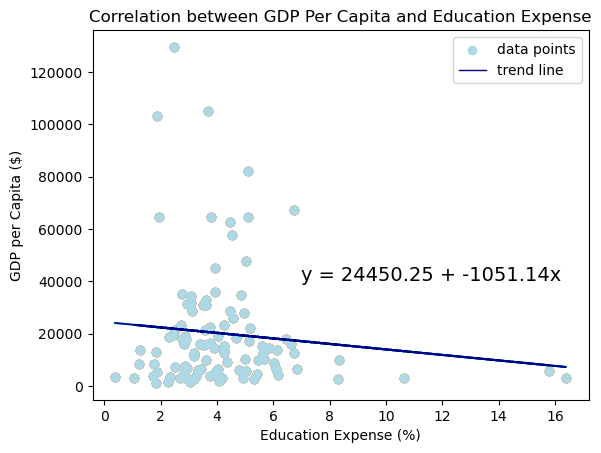

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress

# Define the Data
x = data_combined_ed_unique['Education_Expense']
y = data_combined_ed_unique['GDP_per_capita']

# Undertake a simple linear regression
stats = linregress(x, y)

# Access the regression slope and intercept
m = stats.slope
b = stats.intercept

# Display m and b
print('Slope = ', round(m,3))
print('intercept = ', round(b,3))

# Add points to plot
plt.scatter(x, y)

# Find line of best fit
m, c = np.polyfit(x, y, 1) # 1 means linear

# Add points to plot
plt.scatter(x, y)

# Add line of best fit to plot
plt.plot(x, m*x+c)

# Add points to plot, change points color and add label
plt.scatter(x, y, color='lightblue', label = 'data points')

# Change color of line, change style of line, change linewidth and add label 
plt.plot(x, m*x+c, color='darkblue', linestyle='-', linewidth=1,  
label = 'trend line')

# Add fitted regression equation to the plot
plt.text(7, 40000, 'y = ' + '{:.2f}'.format(c) + ' + {:.2f}'.format(m) + 'x', size=14)

# Add graph title and axis labels
plt.title('Correlation between GDP Per Capita and Education Expense')
plt.xlabel('Education Expense (%)')
plt.ylabel('GDP per Capita ($)')

# Utilise the added labels for the legend
plt.legend(loc="upper right")

## Linear Regression of Education Expenditure and Education Expense

In [15]:
import scipy.stats as stats
from scipy.stats import linregress

# Perform a linear regression and print the R-squared value
reg_ed = stats.linregress(x_ed, y_ed)
r_squared_ed = reg_ed.rvalue**2
print("R-squared: %f" % r_squared_ed)

R-squared: 0.011170


R-squared: 0.01117 means that 1.11% of variation in the data can be explained by education expenditure. Meaning that there is little to none correlation between both variables.

The final result shows that we do not reject the Null hypothesis, and conclude that there is no significant relationship between GDP per Capita and education expenditure.